<a href="https://colab.research.google.com/github/DhruvGheewala/043_DhruvGheewala/blob/master/Lab5/Lab5_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [2]:
# Use seaborn for pairplot
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.6.0


In [3]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70]], dtype='float32')

# Targets (apples)
targets = np.array([[56], [81], [119], [22], [103], [56], [81], [119], [22], [103], [56], [81], [119], [22], [103]], dtype = 'float32')

In [4]:
df_inputs = pd.DataFrame(inputs, columns = ['temp', 'rainfall', 'humidity'])
features = df_inputs.copy()
train_features = features[:10]
test_features = features[10:]

df_targets = pd.DataFrame(targets, columns = ['apples'])
label = df_targets.copy()
train_label =  label[:10]
test_label = label[10:]

In [5]:
train_features.describe().transpose()[['mean', 'std']]

,mean,std
temp,84.400002,12.712199
rainfall,85.599998,32.031929
humidity,54.400002,13.175735


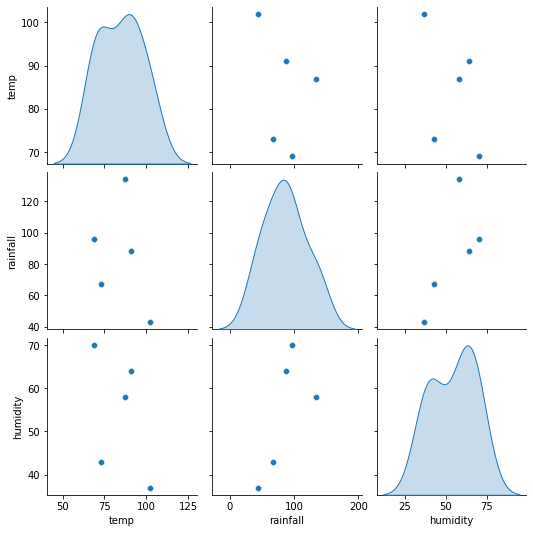

In [6]:
sns.pairplot(train_features[['temp', 'rainfall', 'humidity']], diag_kind = 'kde')

In [7]:
from sklearn.preprocessing import Normalizer
import sklearn.preprocessing

In [8]:
temp = np.array(train_features['temp'])

temp_normalizer = preprocessing.Normalization(input_shape=[1, ], axis = None)
temp_normalizer.adapt(temp)

In [9]:
temp_linear_model = tf.keras.Sequential([
    temp_normalizer,
    layers.Dense(units=1)           
])

In [10]:
temp_linear_model.predict(temp[1:6])

array([[-0.64626706],
       [-0.25458997],
       [-1.7233791 ],
       [ 1.507957  ],
       [ 1.11628   ]], dtype=float32)

In [11]:
temp_linear_model.compile(
    optimizer = tf.optimizers.Adam(learning_rate = 0.1),
    loss='mean_absolute_error'
)

In [12]:
%%time
history = temp_linear_model.fit(
    train_features['temp'], train_label,
    epochs = 1000,
    # suppress logging
    verbose = 0,
    # Calculate validation results on 10% of the training data
    validation_split = 0.3
)

CPU times: user 17.3 s, sys: 785 ms, total: 18.1 s
Wall time: 17.2 s


In [13]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(10)

,loss,val_loss,epoch
990,27.729738,47.922482,990
991,27.723375,47.946564,991
992,27.716995,47.971085,992
993,27.710598,47.996017,993
994,27.704184,48.021313,994
995,27.697758,48.046940,995
996,27.691317,48.072865,996
997,27.684866,48.099072,997
998,27.682848,48.092026,998
999,27.672865,48.088505,999


In [14]:
test_results = {}

test_results['temp_linear_model'] = temp_linear_model.evaluate(
    test_features['temp'],
    test_label,
    verbose=0
)

In [15]:
test_results['temp_linear_model']

33.79361343383789

In [16]:
y = temp_linear_model.predict(test_features['temp'])
print(y)

[[56.048466]
 [56.345917]
 [56.279816]
 [56.52769 ]
 [55.982365]]


In [17]:
norm_test_features = np.linalg.norm(test_features['temp'])
norm_train_features = np.linalg.norm(train_features['temp'])
norm_train_label = np.linalg.norm(train_label['apples'])

normal_array_test_features = test_features['temp'] / norm_test_features
normal_array_train_features = train_features['temp'] / norm_train_features
normal_array_train_label = train_label['apples'] / norm_train_label

print(normal_array_train_features)
print(normal_array_test_features)
print(normal_array_train_label)

0    0.270764
1    0.337528
2    0.322692
3    0.378328
4    0.255928
5    0.270764
6    0.337528
7    0.322692
8    0.378328
9    0.255928
Name: temp, dtype: float32
10    0.382919
11    0.477337
12    0.456355
13    0.535037
14    0.361937
Name: temp, dtype: float32
0    0.211808
1    0.306366
2    0.450093
3    0.083210
4    0.389576
5    0.211808
6    0.306366
7    0.450093
8    0.083210
9    0.389576
Name: apples, dtype: float32


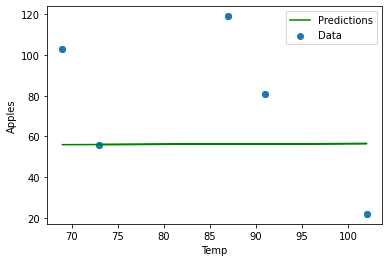

In [18]:
def plot_Apples(x, y):
  plt.scatter(train_features['temp'], train_label['apples'], label = 'Data')
  plt.plot(x, y, color = 'g', label = 'Predictions')
  plt.xlabel('Temp')
  plt.ylabel('Apples')
  plt.legend()
  
plot_Apples(test_features['temp'], y)

In [19]:
normalizer = preprocessing.Normalization(axis = -1)

In [20]:
normalizer.adapt(np.array(train_features))

In [21]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units = 1)
])

In [22]:
linear_model.predict(train_features[:9])

array([[-1.6355182],
       [ 0.8965497],
       [ 1.6396369],
       [-1.5063314],
       [ 0.6056625],
       [-1.6355182],
       [ 0.8965497],
       [ 1.6396369],
       [-1.5063314]], dtype=float32)

In [23]:
linear_model.compile(
    optimizer = tf.optimizers.Adam(learning_rate = 0.1),
    loss='mean_absolute_error'
)

In [24]:
%%time
history = linear_model.fit(
    train_features, train_label, 
    epochs = 1000,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2
)

CPU times: user 16.9 s, sys: 759 ms, total: 17.7 s
Wall time: 16.8 s


In [25]:
test_results['linear_model'] = linear_model.evaluate(test_features, test_label, verbose = 0)
print(test_results['linear_model'])

0.8801330327987671
